In [1]:
import re
import math

import nltk
from pymystem3 import Mystem

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
m = Mystem(end_of_sentence=True)
lit = 'alisa_ch02.txt'
tech = 'mediatext.txt'

In [3]:
def read_text(fname):
    _text = ''
    with open(fname, 'r', encoding="utf-8") as fin:
        _text = fin.read()
    return _text

def get_stopwords():
    fname = 'stopwords/final.txt'
    with open(fname, 'r', encoding="utf-8") as fin:
        _text = fin.read()
        _stopwords = _text.split('\n')
        _stopwords = [_s for _s in _stopwords if not _s.startswith('#')]
    return _stopwords

### 1. Лексико-статистический анализ главы 2 книги Л. Кэрролла, "Приключения Алисы в стране чудес"

In [4]:
text = read_text(lit)
tokens = m.analyze(text)

#### 1.1. Статистические данные словоформ и предложений

In [5]:
sentences = []
sentence = []
for t in tokens:
    if t['text'] == '\s':
        sentences.append(sentence)
        sentence = []
    if 'analysis' in t and t['analysis']:
        sentence.append(t)
avg_sentences = sum(len(t) for t in sentences) / len(sentences)

In [6]:
# Убираем все токены, которые не имеют морфологических данных
tokens = [l for l in tokens if 'analysis' in l and l['analysis']]

In [7]:
unique_words = set(t['text'].lower() for t in tokens)
unique_lexes = set(t['analysis'][0]['lex'].lower() for t in tokens)

In [8]:
print(
f"""
Общее число словоформ: {len(tokens)}
Число различных словоформ: {len(unique_words)}
Разнообразие словоформ текста: {len(unique_words) / len(tokens):.4f}

Число различных лексем: {len(unique_lexes)}
Разнообразие лексем: {len(unique_lexes) / len(tokens):.4f}

Количетво предложений: {len(sentences)}
Максимальная длина предложений: {max(len(t) for t in sentences)}
Минимальная длина предложений: {min(len(t) for t in sentences)}
Средняя длина предложения: {math.floor(avg_sentences)}
"""
)


Общее число словоформ: 1588
Число различных словоформ: 801
Разнообразие словоформ текста: 0.5044

Число различных лексем: 623
Разнообразие лексем: 0.3923

Количетво предложений: 108
Максимальная длина предложений: 93
Минимальная длина предложений: 2
Средняя длина предложения: 14



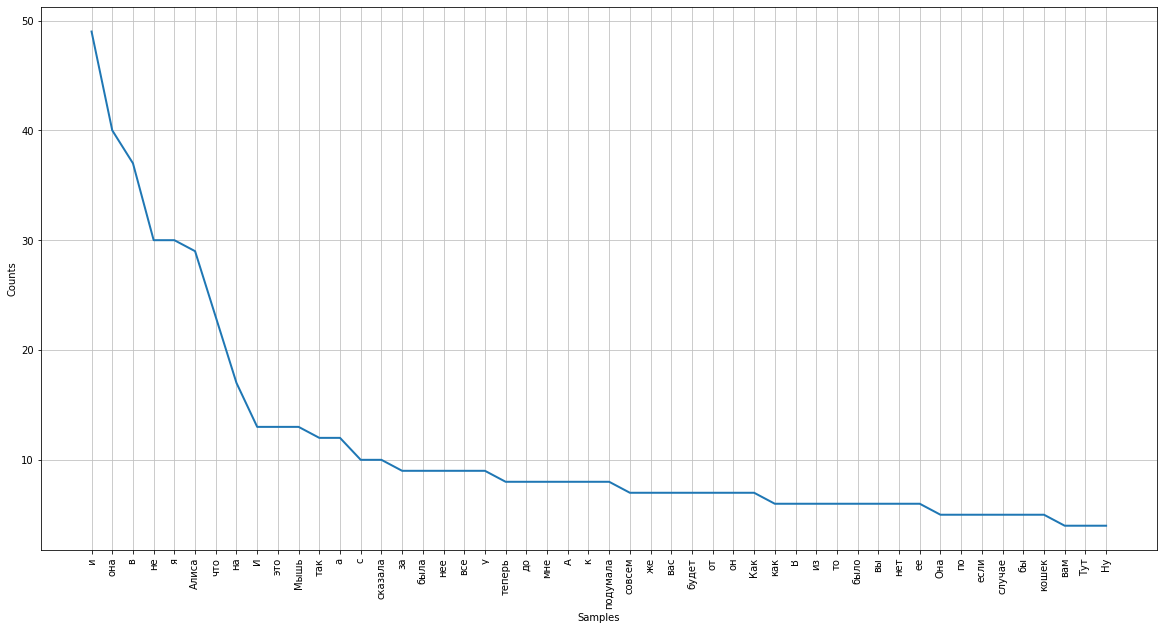

In [9]:
words = [t['text'] for t in tokens]
fdist = nltk.FreqDist(words)
_ = fdist.plot(50)

In [10]:
# список токенов без стопслов
stopwords = get_stopwords()
words_without_stopwords = [t['text'] for t in tokens if t['analysis'][0]['lex'].lower() not in stopwords]

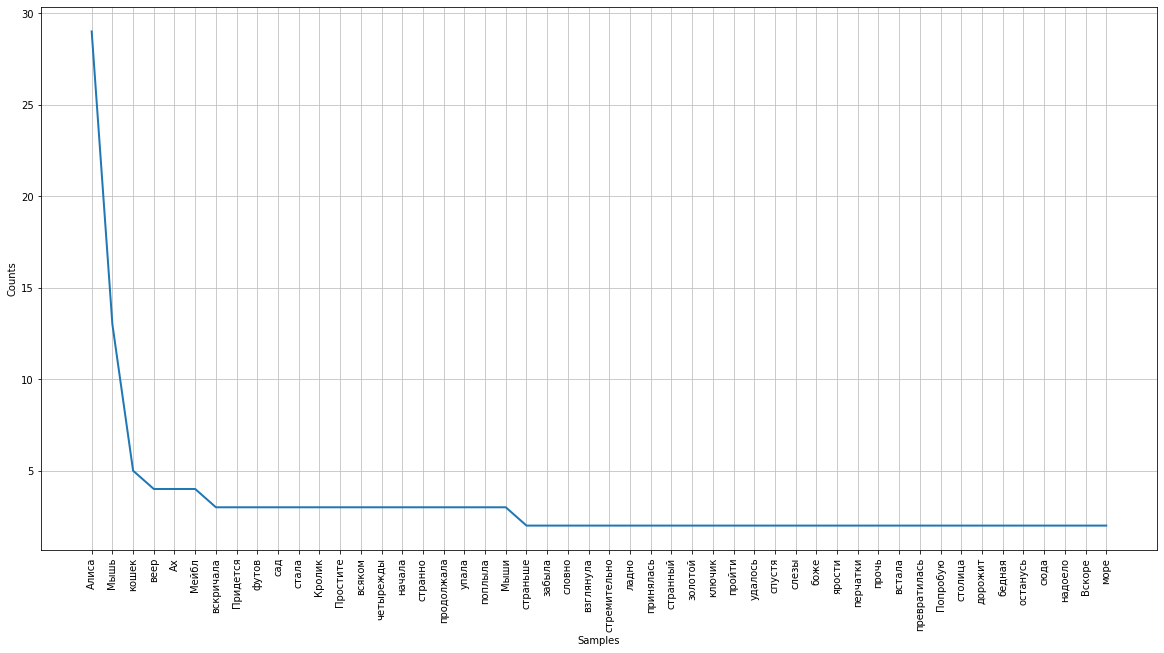

In [11]:
fdist_stopwords = nltk.FreqDist(words_without_stopwords)
_ = fdist_stopwords.plot(50)

#### 1.2. Статистические данные по омонимичным словам

In [12]:
m2 = Mystem(disambiguation=False, weight=True, end_of_sentence=True)

In [13]:
tokens2 = m2.analyze(text)

In [14]:
# Убираем все токены, которые не имеют морфологических данных
tokens2 = [t for t in tokens2 if 'analysis' in t and t['analysis']]
ambig_tokens = [t for t in tokens2 if len(t['analysis']) > 1]
ambig_words = [t['text'].lower() for t in ambig_tokens]
unique_ambig_words = set(t['text'].lower() for t in ambig_tokens)

In [15]:
print(f"""
Количество омонимичных слов: {len(ambig_tokens)}
Абсолютная частота омонимичных слов: {len(ambig_tokens) / len(tokens2):.4f}
Разнообразие омонимичных слов: {len(unique_ambig_words) / len(ambig_words):.4f}
""")


Количество омонимичных слов: 725
Абсолютная частота омонимичных слов: 0.4565
Разнообразие омонимичных слов: 0.3766



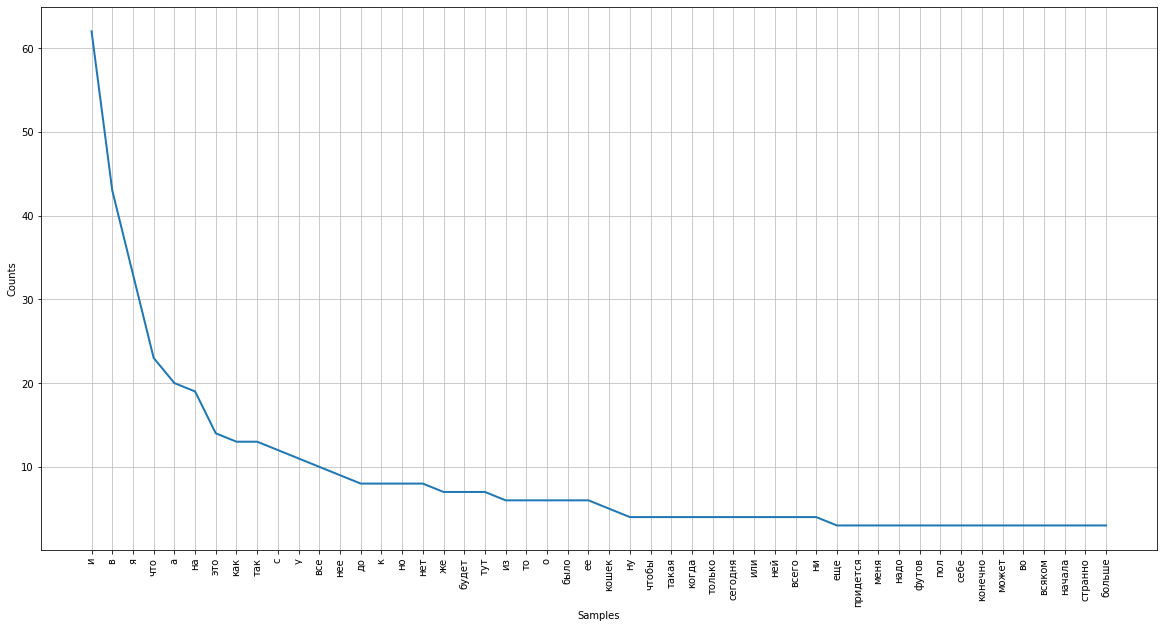

In [16]:
fdist_ambig = nltk.FreqDist(ambig_words)
_ = fdist_ambig.plot(50)

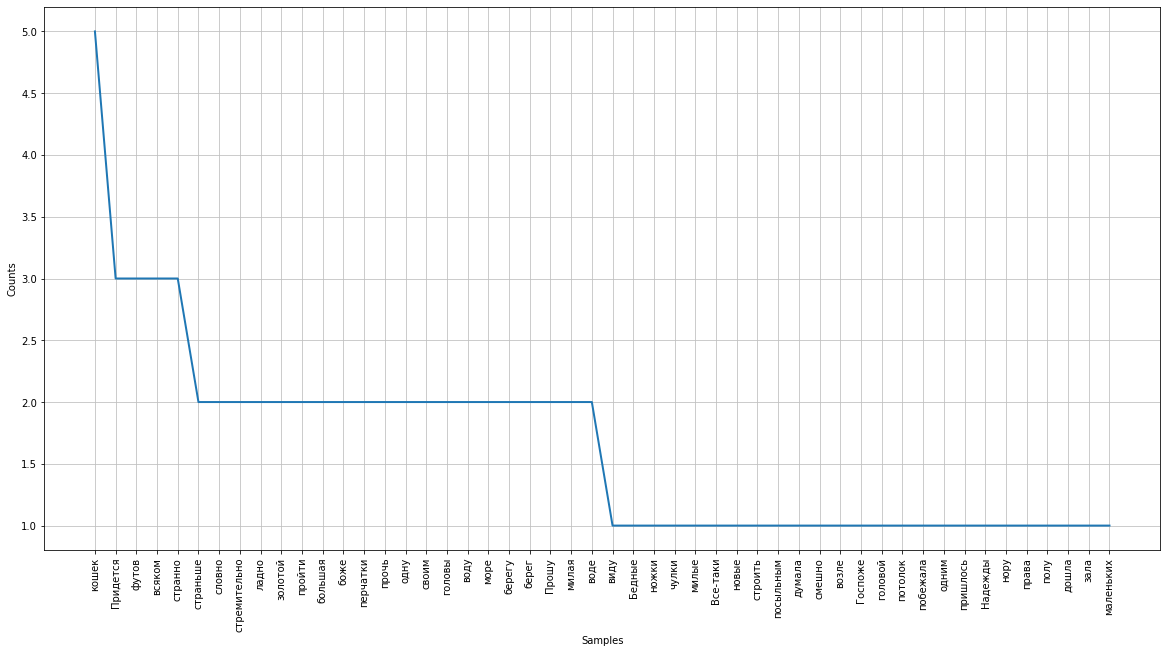

In [17]:
ambig_without_stopwords = [t['text'] for t in ambig_tokens if t['text'].lower() not in stopwords]
fdist_ambig = nltk.FreqDist(ambig_without_stopwords)
_ = fdist_ambig.plot(50)

#### 1.3. Статистические данные морфологических данных (со снятой омонимией)

In [18]:
tokens[1]['analysis'][0]['gr'].split(',')[0].split('=')[0]

'ADV'

In [28]:
def plot_postags_piechart(provided_tokens):
    postags = [t['analysis'][0]['gr'].split(',')[0].split('=')[0] for t in provided_tokens]
    unique_postags = set(postags)

    postags_freq = {u: len([p for p in postags if p == u]) / len(postags) for u in unique_postags}
    smallest_freq = {k: v for k, v in postags_freq.items() if v < 0.04}
    if len(smallest_freq):
        for k in smallest_freq:
            del postags_freq[k]
        postags_freq.update({','.join(smallest_freq.keys()): sum(smallest_freq.values())})

    labels = postags_freq.keys()
    sizes = postags_freq.values()

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

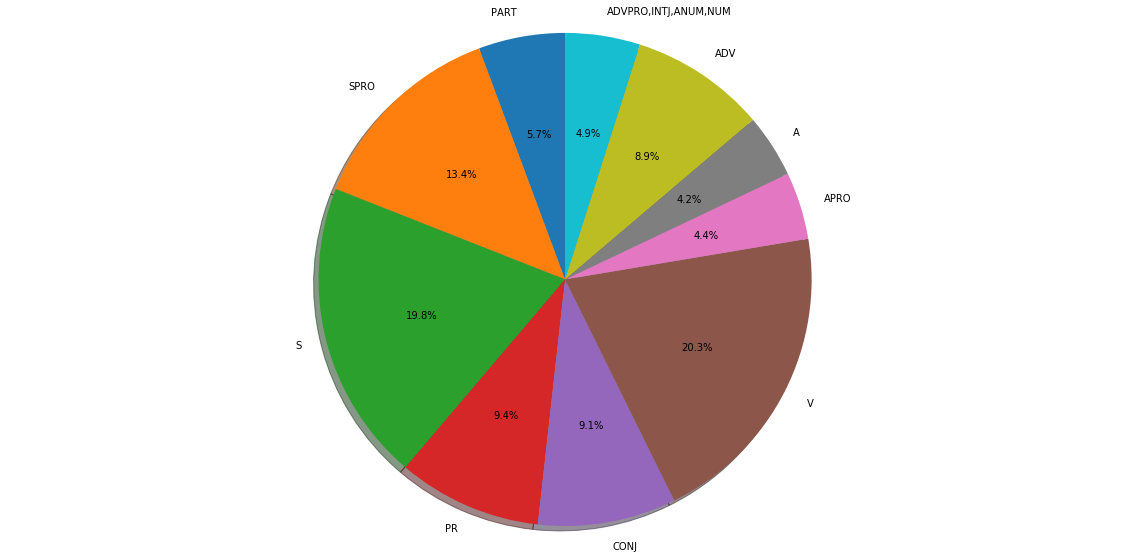

In [29]:
# построим круговую диаграмму частот всех частей речи, которые встречаются в тексте
plot_postags_piechart(tokens)

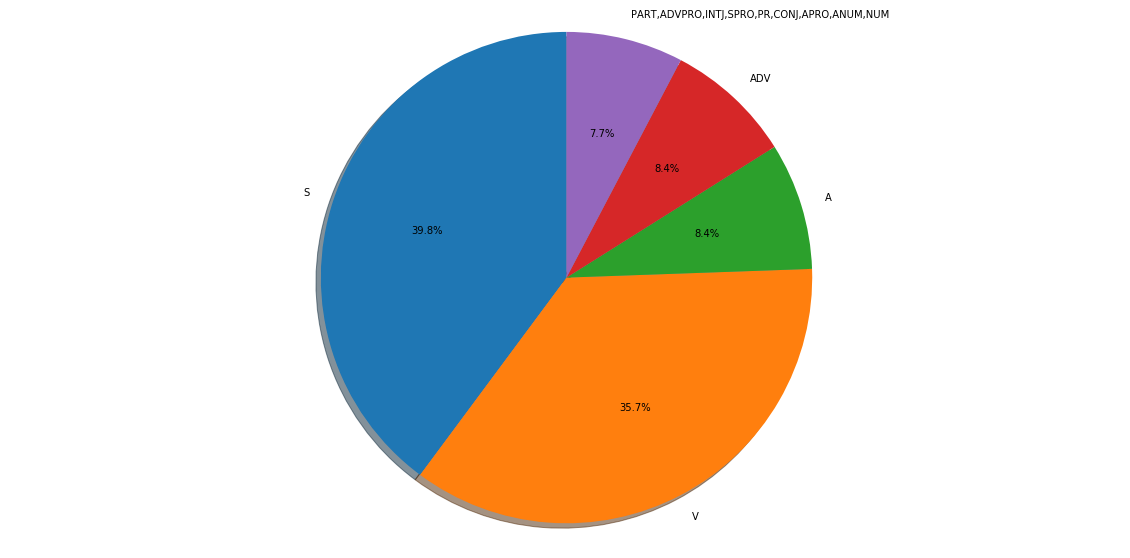

In [30]:
# теперь построим круговую диаграмму убрав стоп-слова из списка токенов
tokens3 = [t for t in tokens if t['text'].lower() not in stopwords]

plot_postags_piechart(tokens3)

In [51]:
ttoks = tokens
noun_grs = [t['analysis'][0]['gr'] for t in ttoks if 'S,' in t['analysis'][0]['gr']]
len([g for g in noun_grs if 'им' in g]) / len(noun_grs)
len([g for g in noun_grs if 'им' in g]) / len(noun_grs)
len([g for g in noun_grs if 'им' in g]) / len(noun_grs)
len([g for g in noun_grs if 'им' in g]) / len(noun_grs)
len([g for g in noun_grs if 'им' in g]) / len(noun_grs)

0.6114649681528662